In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
#%matplotlib inline 
#used for Visualization in the Jupyter notebook



In [4]:
# importing Computer Dataset
computers = pd.read_csv("datasets\computers.csv")


In [5]:
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [6]:
#Feature Engineering
mean_value =computers['Minutes'].mean()
mean_value

97.21428571428571

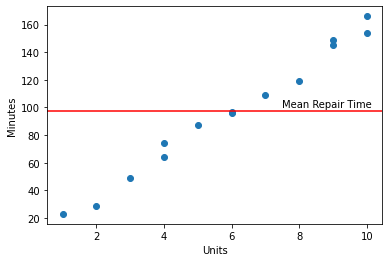

In [7]:
#plotting data to get insights

plt.scatter(computers['Units'],computers['Minutes'],marker="o")
plt.axhline(y=mean_value,color='red')

#adding mean value line
plt.annotate('Mean Repair Time', xy=(7.5,mean_value +3))



#labelling Axis
plt.xlabel("Units")
plt.ylabel("Minutes")

plt.show()

In [8]:
minutes_model0 = computers['Minutes'].mean() #assumed that the time taken to repair a computer is constant
minutes_model1 = computers['Units'] * 12 +10 #assumed some inspection time and some working time
minutes_model2 = computers['Units'] * 18 +6 #assumed some inspection time and some working time

#adding data to the table
computers['minutes_model0']= minutes_model0
computers['minutes_model1']= minutes_model1
computers['minutes_model2']= minutes_model2

computers.head()


,Units,Minutes,minutes_model0,minutes_model1,minutes_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78


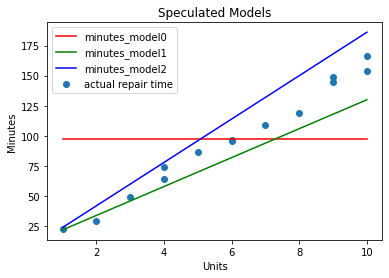

In [10]:
#Visualization of models
fig,ax = plt.subplots()

ax.scatter(computers['Units'],computers['Minutes'],label='actual repair time')
ax.plot(computers['Units'],computers['minutes_model0'],color='red' ,label='minutes_model0')
ax.plot(computers['Units'],computers['minutes_model1'],color='green',label='minutes_model1')
ax.plot(computers['Units'],computers['minutes_model2'],color='blue',label='minutes_model2')

ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()


In [8]:

minutes_model0 = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['minutes_model0'],
              "Error":(computers['minutes_model0'] - computers['Minutes'])})
minutes_model0

minutes_model0_SSE = sum(minutes_model0['Error']**2)

minutes_model0_SSE



27768.357142857145

In [9]:

minutes_model1 = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['minutes_model1'],
              "Error":(computers['minutes_model1'] - computers['Minutes'])})
minutes_model1

minutes_model1_SSE = sum(minutes_model1['Error']**2)

minutes_model1_SSE

4993

In [10]:

minutes_model2 = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['minutes_model2'],
              "Error":(computers['minutes_model2'] - computers['Minutes'])})
minutes_model2

minutes_model2_SSE = sum(minutes_model2['Error']**2)

print(f"{minutes_model0_SSE} {minutes_model1_SSE} {minutes_model2_SSE}")

27768.357142857145 4993 5001


In [11]:
#calculating optimal values for cofficient

x = computers.Units 
y = computers.Minutes

xiyi = computers["Minutes"]*computers["Units"]
n=len(computers)
x_Mean = computers["Units"].mean()
y_Mean = computers["Minutes"].mean()

numerator = xiyi.sum() - n*x_Mean*y_Mean

denominator = (x**2).sum() - n*x_Mean**2

m= numerator/denominator
c = y_Mean - m*x_Mean

print(f"m={m}  c={c}")


m=15.508771929824569  c=4.161654135338296


In [12]:
min_best_fit_model = c + m*computers["Units"]

computers['min_best_fit_model']= min_best_fit_model

min_best_fit_model_Obs=  pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_best_fit_model'],
              "Error":(computers['min_best_fit_model'] - computers['Minutes'])})




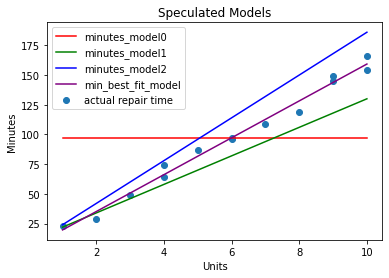

In [13]:
#Visualization of models
fig,ax = plt.subplots()

ax.scatter(computers['Units'],computers['Minutes'],label='actual repair time')
ax.plot(computers['Units'],computers['minutes_model0'],color='red' ,label='minutes_model0')
ax.plot(computers['Units'],computers['minutes_model1'],color='green',label='minutes_model1')
ax.plot(computers['Units'],computers['minutes_model2'],color='blue',label='minutes_model2')
ax.plot(computers['Units'],computers['min_best_fit_model'],color='purple',label='min_best_fit_model')

ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()


In [14]:
min_best_fit_model_Obs

min_best_fit_model_SSE = sum(min_best_fit_model_Obs['Error']**2)
min_best_fit_model_SSE

348.848370927318

In [15]:
# using scikit libraries

from sklearn.linear_model import LinearRegression

X = computers[["Units"]]

y= computers["Minutes"]

model= LinearRegression()

model.fit(X,y)

print(model.intercept_) # c value
print(model.coef_) # m value



4.161654135338296
[15.50877193]


In [30]:
computers
min_best_fit_model_Obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [31]:
# manually finding Coefficient of determination R**2 =  SSR/SST 
# relation is SST = SSR + SSE

SSR= sum((computers['min_best_fit_model'] - computers['Minutes'].mean())**2)

SST = sum((computers['Minutes'] - computers['Minutes'].mean())**2)

SSE = sum(min_best_fit_model_Obs['Error']**2)

SSR = SST - SSE

Coefficient_of_determination = SSR/SST

Coefficient_of_determination


0.9874371980620736

In [27]:
# Using sklearn module finding Coefficient of determination R**2 =  SSR/SST 

Coefficient_of_determination1 = model.score(computers[['Units']],computers['Minutes'])

Coefficient_of_determination1

0.9874371980620736